In [23]:
import json
from itertools import combinations
import numpy as np
from matplotlib import pyplot as plt
from skimage.draw import polygon
from skimage.morphology import skeletonize, skeletonize_3d, medial_axis
from skimage.measure import regionprops, label

## Methods definition

In [24]:
def extract_name(feature):
    if 'name' in feature['properties']:
        return feature['properties']['name']
    elif 'wikipedia' in feature['properties']:
        return feature['properties']['wikipedia']
    else:
        return None
    

In [25]:
def extract_coordinates(feature):
    x_coordinates = []
    y_coordinates = []
    for point in feature['geometry']['coordinates'][0]:
        x_coordinates.append(point[0])
        y_coordinates.append(point[1])
                
    return x_coordinates, y_coordinates

In [26]:
def binary_image(im_size, x_coordinates, y_coordinates):
    x_coordinates = np.array(x_coordinates)
    y_coordinates = np.array(y_coordinates)

    x_coordinates -= min(x_coordinates)
    y_coordinates -= min(y_coordinates)


    x_max = max(x_coordinates)
    y_max = max(y_coordinates)

    if x_max >= y_max:
        ratio = im_size/x_max

    else:
        ratio = im_size/y_max

    x_coordinates *= ratio
    y_coordinates *= ratio

    img = np.zeros((im_size, im_size), dtype=np.uint8)

    x, y = polygon(x_coordinates, y_coordinates)
    img[x, y] = 1
    
    return img

## Data loading

In [27]:
im_size = 300


In [28]:
with open('geojson/lacs_chablais.geojson') as f:
    lacs_chablais = json.load(f)

#### TODO: Manage multipolygon

In [91]:
lakes = []
for feature in lacs_chablais['features']:
    if feature['geometry']['type'] == 'Polygon':
        name = extract_name(feature)
        coordinates = extract_coordinates(feature)
        bin_image = binary_image(im_size, *coordinates)
        lakes.append((name, bin_image, coordinates))

In [92]:
def logical_distance(im1, im2):
    im_xor = np.logical_xor(im1,im2)
    #plt.imshow(im_xor)
    #plt.show()
    return np.sum(im_xor)
    

In [93]:
im1 = lakes[0][1]
im2 = lakes[1][1]

total_sum = logical_distance(im1, im2)

In [94]:
total_sum

51161

In [95]:
distances = []
for lake1, lake2 in combinations(lakes,2):
    distances.append((logical_distance(lake1[1], lake2[1]), lake1, lake2))
    

In [96]:
distances = sorted(distances, key=lambda d: d[0])

In [97]:
distances[0]

(3981, ('Lac de Montriond', array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), ([6.7222688,
    6.7222731,
    6.7222656,
    6.7222277,
    6.7221205,
    6.7219423,
    6.7218873,
    6.72184,
    6.7217913,
    6.7217564,
    6.721701,
    6.7216362,
    6.7215349,
    6.7214387,
    6.7213635,
    6.7212881,
    6.7212306,
    6.7211754,
    6.7211207,
    6.7210547,
    6.7209837,
    6.7209244,
    6.7208321,
    6.7207561,
    6.7206866,
    6.7206069,
    6.720452,
    6.7204514,
    6.7204506,
    6.7204727,
    6.7205175,
    6.7205563,
    6.7205879,
    6.7206908,
    6.7207036,
    6.7207267,
    6.7207535,
    6.7208112,
    6.7210435,
    6.7213935,
    6.7214728,
    6.7215493,
    6.7216297,
    6.7219057,
    6.7220062,
    6.722112,
    6.7221752,
    6.7222288,
    6.7222436,
    6.7222598

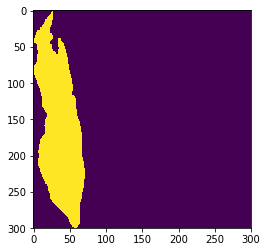

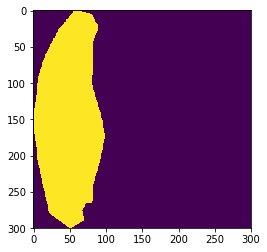

In [98]:
distance = distances[16]

plt.imshow(distance[1][1])
plt.show()
plt.imshow(distance[2][1])
plt.show()

Lac Léman
-1.3914594508201885


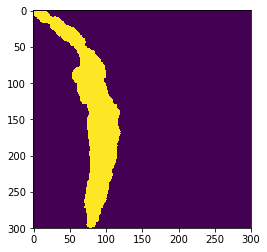

Lac de Sauvabelin
1.1144253126302555


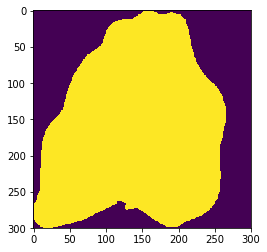

fr:Lac de Divonne
-0.7452360813456722


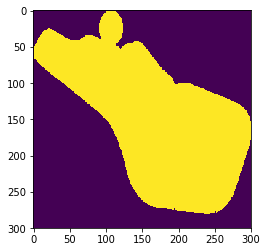

Lac de Bellefontaine
-0.9956267211538175


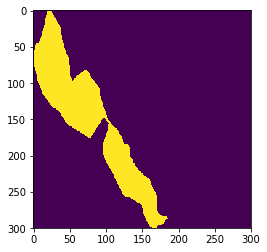

Lac Tanay
-1.4553909147172017


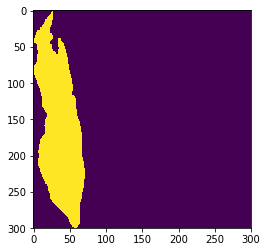

None
-0.4412948292340287


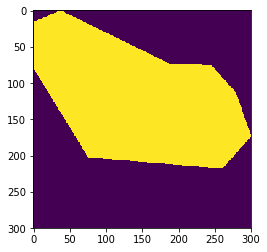

Lac de Tavaneuse
-0.07905719847798058


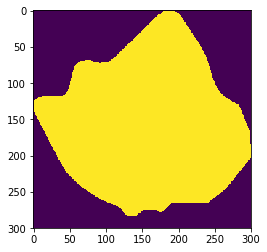

Lac des Mortes
-1.0522388667007916


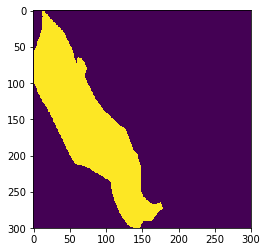

Lac des Rousses
-1.0800778439630392


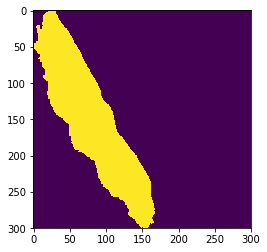

Lac d'Arvouin
1.413421866091415


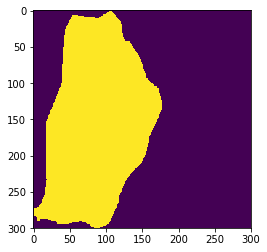

Lac de Roy
-0.005730325863457777


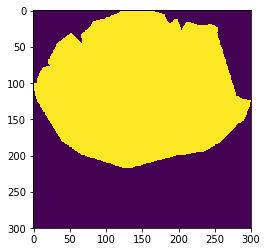

Lac de Montriond
-1.5199023366939621


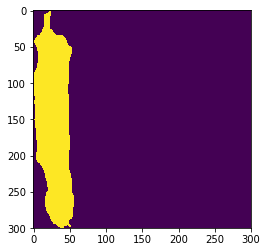

Lac des Plagnes
1.567764488984709


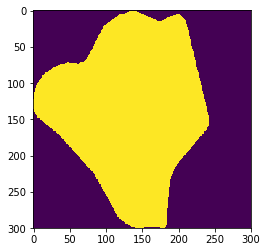

Lac Bleu
1.5456918386090377


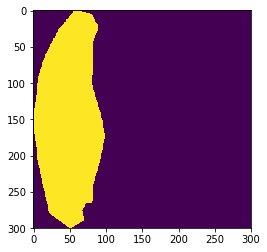

None
0.989627359961374


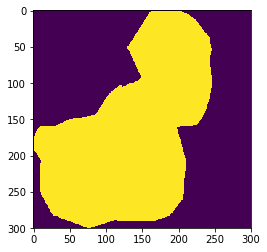

Lac d'Anton
0.9952502066300378


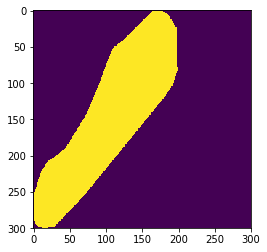

Lac de Darbon
1.4079535793366167


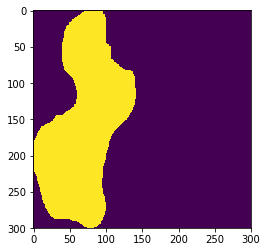

None
-0.8576700494570039


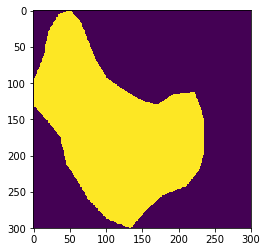

None
1.4448870319109113


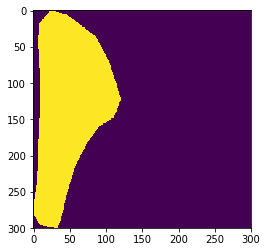

None
-0.4602570544860584


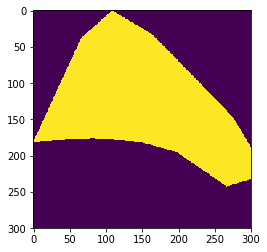

None
-1.104618335611773


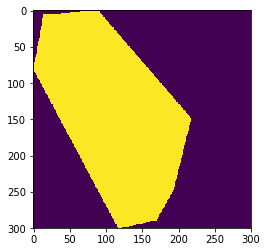

None
-0.8695463354489485


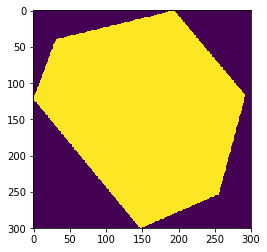

None
1.4008920505654026


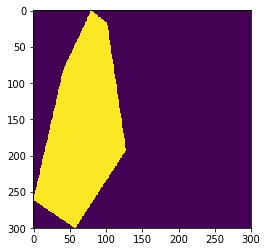

Lac du Mont Bénand
-1.1533267493953165


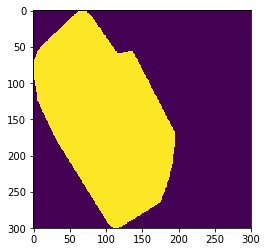

Lac de Blantsin
-1.0908346847167685


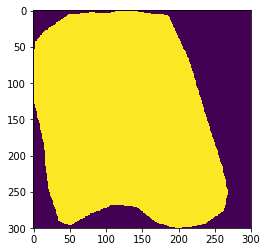

None
-0.8537106833777363


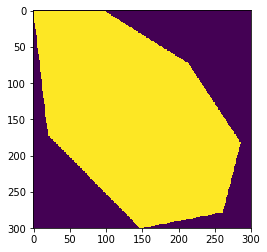

None
1.1702523600662371


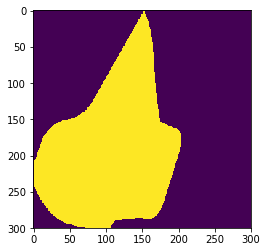

Lac de Fontanabran
-0.038685638714758386


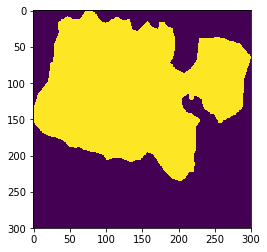

None
0.9615746030371753


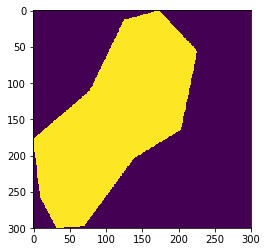

None
1.5622511366300444


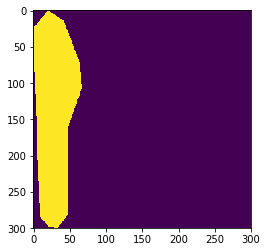

None
1.446854914157465


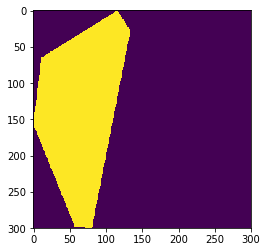

None
0.8452187933200765


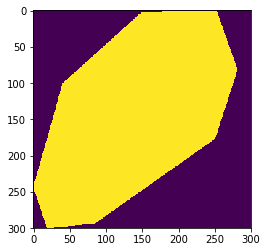

None
1.5241182818543173


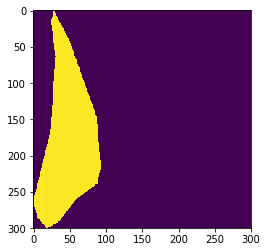

Lac de Sageroux
-1.5501002149866752


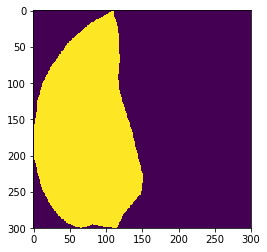

Lac de Bret
-0.5870771802065755


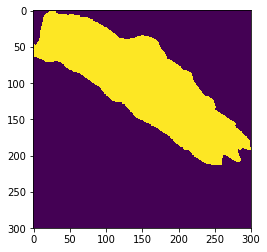

None
-1.5559994006237101


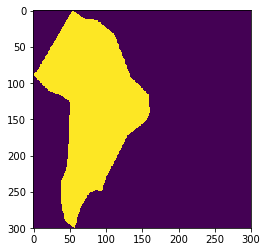

None
-1.5187270998066382


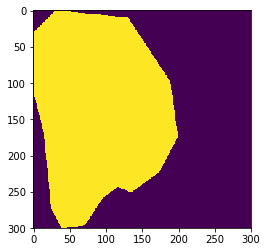

In [101]:
for name, bin_im, coordinates in lakes:
    props = regionprops(bin_im)
    plt.imshow(bin_im)
    print(name)
    print(props[0]['orientation'])
    plt.show()
    

In [102]:
with open('geojson/lac_des_rousses.geojson') as f:
    data = json.load(f)

In [103]:
x_coordinates, y_coordinates = extract_coordinates(data['features'][0])

## Binary image creation

In [104]:
lac_des_rousses_bin = binary_image(im_size, x_coordinates, y_coordinates)

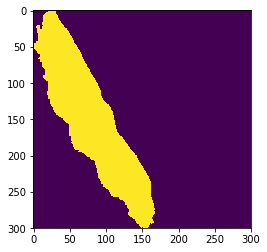

In [105]:
plt.imshow(lac_des_rousses_bin)
plt.show()

### Unique Orientation

In [111]:
def unique_orientation_coords(bin_image, x_coords, y_coords):
    props = regionprops(bin_image)

    angle = -props[0].orientation
    cos = np.cos(angle)
    sin = np.sin(angle)

    x_coords_rot = []
    y_coords_rot = []

    for i in range(len(x_coords)):
        x = x_coords[i]
        y = y_coords[i]

        x_coords_rot.append(x * cos - y * sin)
        y_coords_rot.append(y * cos + x * sin)
        
    return x_coords_rot, y_coords_rot

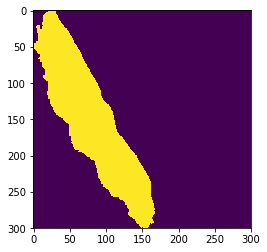

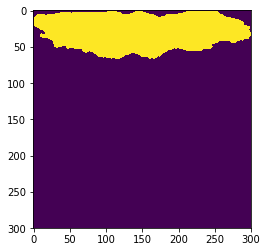

In [112]:
plt.imshow(lac_des_rousses_bin)
plt.show()

x_coords_rot, y_coords_rot = unique_orientation_coords(lac_des_rousses_bin, x_coordinates, y_coordinates)
lac_des_rousses_bin_rot = binary_image(im_size, x_coords_rot, y_coords_rot)

plt.imshow(lac_des_rousses_bin_rot)
plt.show()

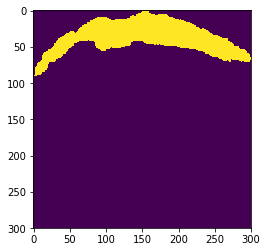

Lac Léman


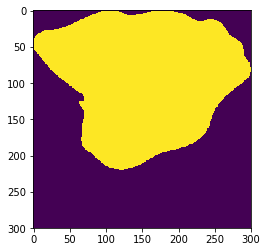

Lac de Sauvabelin


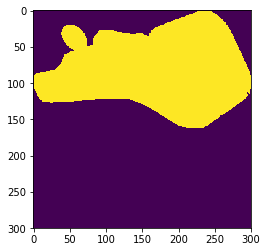

fr:Lac de Divonne


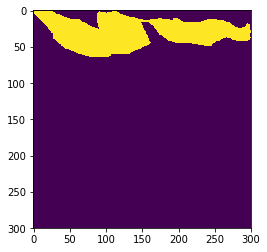

Lac de Bellefontaine


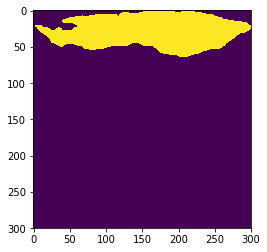

Lac Tanay


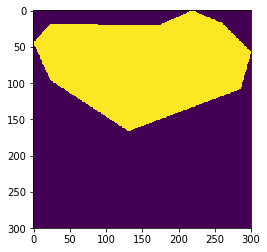

None


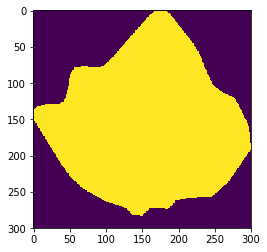

Lac de Tavaneuse


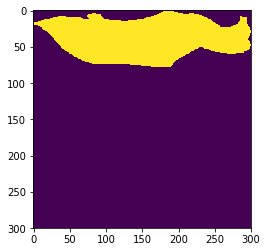

Lac des Mortes


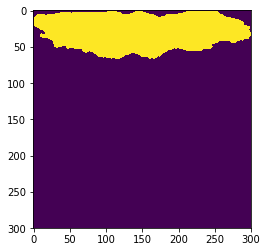

Lac des Rousses


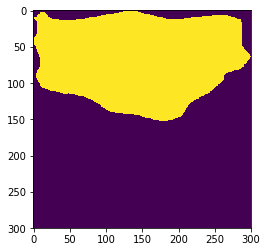

Lac d'Arvouin


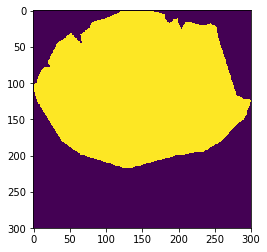

Lac de Roy


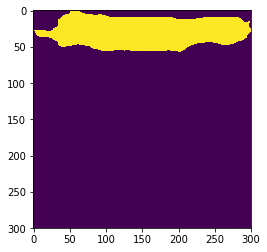

Lac de Montriond


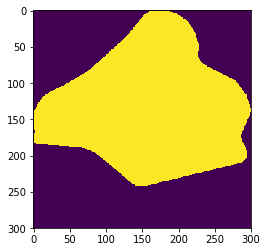

Lac des Plagnes


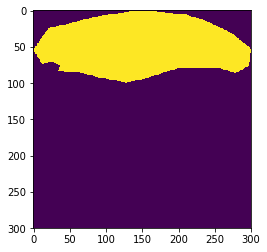

Lac Bleu


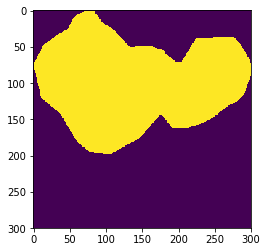

None


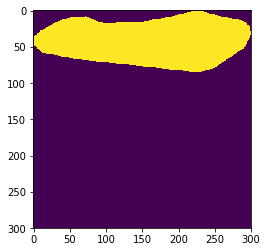

Lac d'Anton


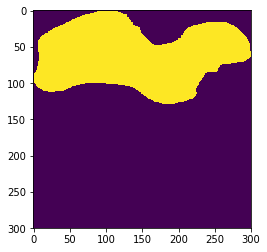

Lac de Darbon


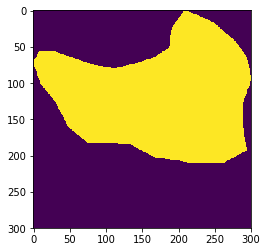

None


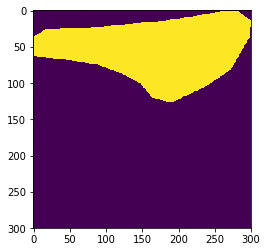

None


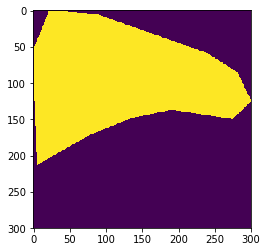

None


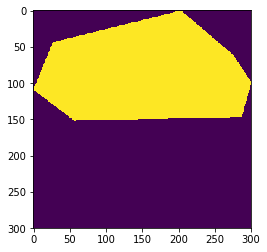

None


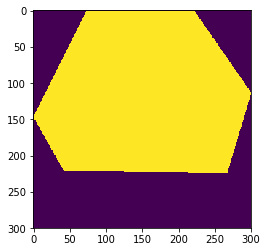

None


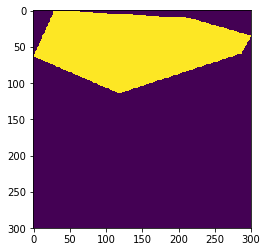

None


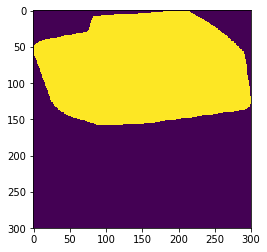

Lac du Mont Bénand


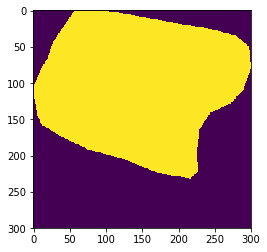

Lac de Blantsin


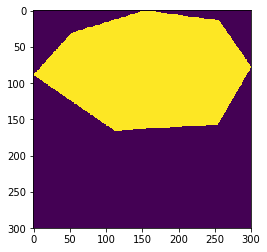

None


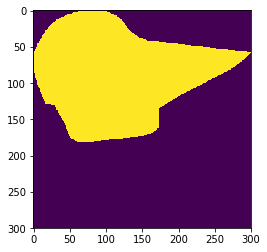

None


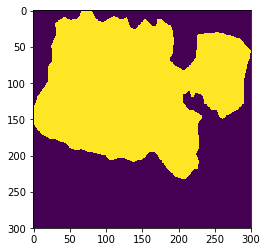

Lac de Fontanabran


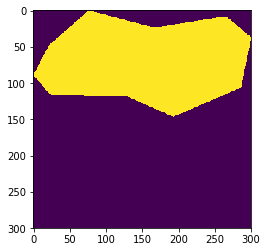

None


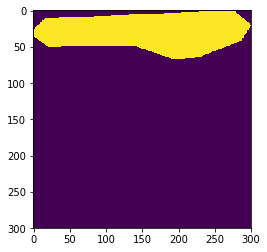

None


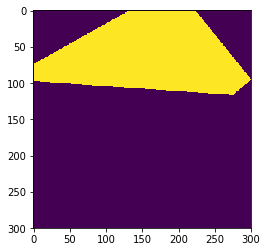

None


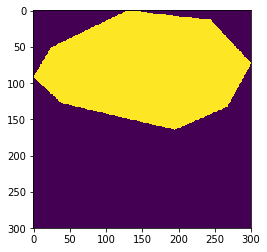

None


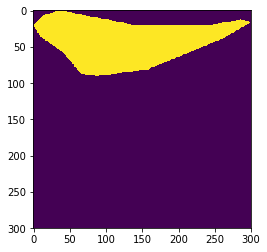

None


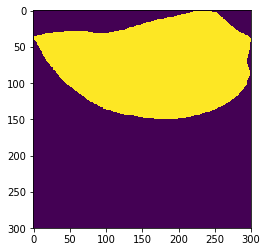

Lac de Sageroux


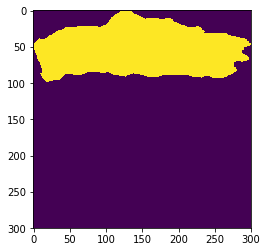

Lac de Bret


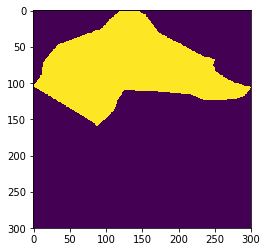

None


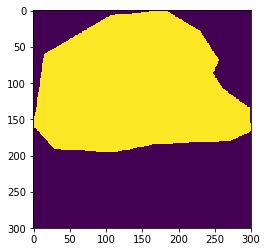

None


In [113]:
for name, bin_image, coordinates in lakes:
    props = regionprops(bin_image)
    
    x_coords_rot, y_coords_rot = unique_orientation_coords(bin_image, coordinates[0], coordinates[1])
    bin_image_rot = binary_image(im_size, x_coords_rot, y_coords_rot)
    
    plt.imshow(bin_image_rot)
    plt.show()
    print(name)

### Skeleton vs Medial Axi vs Skeleton 3D

In [114]:
skeleton = skeletonize(lac_des_rousses_bin)

In [115]:
skeleton

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

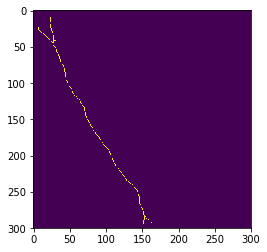

In [116]:
plt.imshow(skeleton)
plt.show()

In [61]:
skel, distance = medial_axis(lac_des_rousses_bin, return_distance=True)

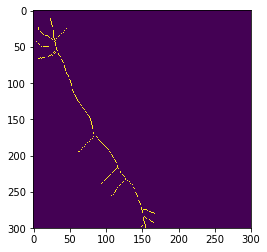

In [62]:
plt.imshow(skel)
plt.show()

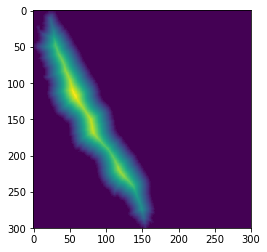

In [65]:
plt.imshow(distance) #TODO use distance instead of 0-1 entries
plt.show()

In [67]:
skeleton_3d = skeletonize_3d(lac_des_rousses_bin)

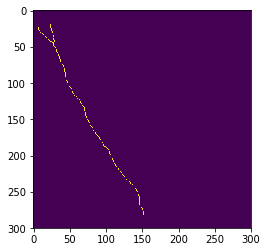

In [68]:
plt.imshow(skeleton_3d)
plt.show()